# Data Quallity Report

This report contains results from analysis of the quality of data for the dataset 'bcxlocation_20190701_00' which contains information about BCX locations.

In [58]:
#Imports
import pandas as pd
import numpy as np
import missingno as mgno
import matplotlib.pyplot as plt

In [59]:
#Load data
df = pd.read_parquet('bcxlocation_20190701_00.parquet', engine='pyarrow')

In [60]:
# !pip install -U pyarrow

In [61]:
# !pip install missingno

# Index

1. Data Accuary
   - Columns
   - Types
   
2. Data Consistency
   - Unique Values
   - Value Counts
       - G City
       - G Suburb
       - G Street Name
       - G Str Num
       - Loc Region
       - Fibre Status
       - Max Cbr Speed
       - Me Status
       - Me Classification
       - Mt Lte
   
3. Data Completeness
   - Missing Values
   - Missing Values Percent
   
4. Summary Statistics
   - Mode
   - Mode Frequency
   - Mode %
   
5. Data Quality Report

6. Conclusion

# 1. Data Accuracy

### Columns

In [62]:
columns = pd.DataFrame(list(df.columns.values))
columns

,0
0,Am Id
1,Lat
2,Lon
3,G City
4,G Suburb
5,G Street Name
6,G Str Num
7,Loc Region
8,Fibre Status
9,Max Cbr Speed


### Types

In [63]:
data_types = pd.DataFrame(df.dtypes,
                          columns=['Data Type'])
data_types


,Data Type
Am Id,int64
Lat,object
Lon,object
G City,object
G Suburb,object
G Street Name,object
G Str Num,object
Loc Region,object
Fibre Status,object
Max Cbr Speed,object


#### Notes
All features of the dataset, apart from the 'Am Id' which is a unique identifier, are categorical.

# 2. Data Consistency

### Unique Values

In [64]:
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(df.columns.values):
    unique_value_counts.loc[v] = [df[v].nunique()]
unique_value_counts

,Unique Values
Am Id,24016
Lat,20898
Lon,20906
G City,1136
G Suburb,6054
G Street Name,9573
G Str Num,5137
Loc Region,7
Fibre Status,8
Max Cbr Speed,19


### Value Counts

### G City

In [65]:
city = df['G City'].value_counts()
city = city.to_frame().reset_index()
city = city.sort_values(by=['index'], ascending=True)
city.head(20)

,index,G City
1120,(blank),1
253,ABERDEEN,18
436,ACORNHOEK,10
411,ADDO,11
296,ADELAIDE,16
636,AGGENEYS,5
528,AIRPORT,8
153,AKASIA,32
459,ALBERTINIA,9
27,ALBERTON,126


#### Notes:
Suburb names are repeated as city names

### G Suburb 

In [66]:
suburb = df['G Suburb'].value_counts()
suburb = suburb.to_frame().reset_index()
suburb = suburb.sort_values(by=['index'], ascending=True)
suburb.iloc[115:140]

,index,G Suburb
3045,AMSTERDAMHOEK,1
5903,ANDERBOLT,1
5843,ANDERBOLT X 115,1
5028,ANDERBOLT X 19,1
4118,ANDERBOLT X 51,1
1971,ANDERBOLT X 64,3
4530,ANDERBOLT X 8,1
5543,ANDERBOLT X 95,1
4657,ANDERSONVILLE,1
869,ANNADALE,6


#### Notes:
Duplicate suburb names. Certain suburb names are listed with numbers, example 'Anderbolt x 115'. 

### G Street Name

In [67]:
street = df['G Street Name'].value_counts()
street = street.to_frame().reset_index()
street = street.sort_values(by=['index'], ascending=True)
street.iloc[100:140]

,index,G Street Name
8843,ACROPOLIS DR,1
7190,ACTIVIA RD,1
8660,ACTON RD,1
5975,ACUTT AV,1
8940,ACUTT RD,1
9449,AD KEET ST,1
1281,ADA ST,3
9222,ADAM NAMAKOLA ST,1
2793,ADAM ST,2
3523,ADAM TAS RD,2


### G Str Num

In [68]:
num = df['G Str Num'].value_counts()
num = num.to_frame().reset_index()
num = num.sort_values(by=['index'], ascending=True)
num.iloc[0:40]


,index,G Str Num
5067,(blank),1
1746,..1,1
2299,..33,1
1801,.0,1
2795,.1,1
3430,.180,1
1856,.1\566,1
3136,.23,1
3668,.243,1
3413,.320,1


### Loc Region

In [69]:
region = df['Loc Region'].value_counts()
region = region.to_frame()

Text(0.5,1,'Loc Region')

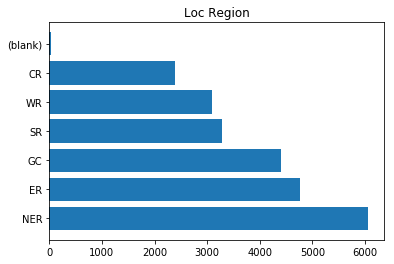

In [70]:
plt.barh(region.index, region['Loc Region'])
plt.title('Loc Region')

### Fibre Status

In [71]:
fibre_status = df['Fibre Status'].value_counts()
fibre_status = fibre_status.to_frame()

Text(0.5,1,'Fibre Status')

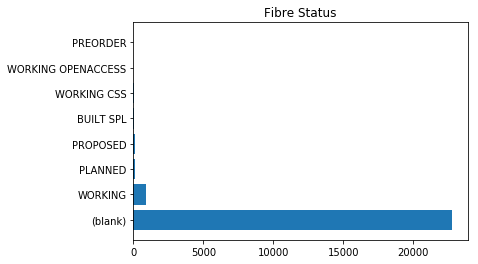

In [72]:
plt.barh(fibre_status.index, fibre_status['Fibre Status'])
plt.title('Fibre Status')

#### Notes:
Large amount of blank values - incomplete data.

### Max Cbr Speed

In [73]:
speed = df['Max Cbr Speed'].value_counts()
speed = speed.to_frame()

Text(0.5,1,'Max Cbr Speed')

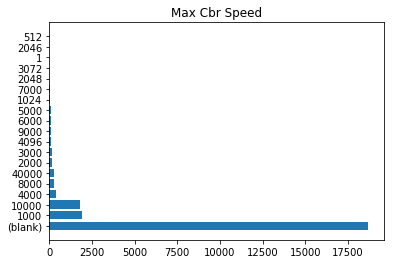

In [74]:
plt.barh(speed.index, speed['Max Cbr Speed'])
plt.title('Max Cbr Speed')

#### Notes:
Large amount of blank values - incomplete data.

### Me Status

In [77]:
me_status = df['Me Status'].value_counts()
me_status = me_status.to_frame()
me_status

,Me Status
WORKING,18308
N,5020
BUILD,403
PLANNED,259
(blank),26


Text(0.5,1,'Me Status')

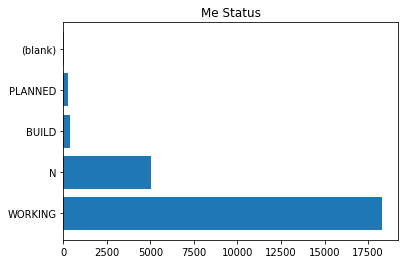

In [78]:
plt.barh(me_status.index, me_status['Me Status'])
plt.title('Me Status')

### Me Classification

In [79]:
me_class = df['Me Classification'].value_counts()
me_class = me_class.to_frame()
me_class

,Me Classification
Intra-city,11122
Inter-city,7089
(blank),5740
Intra-city?,27
Inter-city?,22
na,16


Text(0.5,1,'Me Classification')

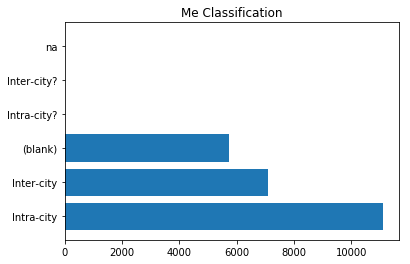

In [80]:
plt.barh(me_class.index, me_class['Me Classification'])
plt.title('Me Classification')

#### Notes:
Duplicate category names.

### Mt Lte

In [81]:
lte = df['Mt Lte'].value_counts()
lte = lte.to_frame()
lte

,Mt Lte
LTE,12442
(blank),11574


Text(0.5,1,'Mt Lte')

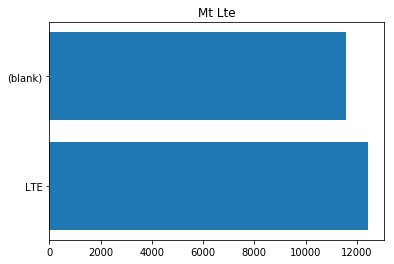

In [82]:
plt.barh(lte.index, lte['Mt Lte'])
plt.title('Mt Lte')

#### Notes:
Large amount of blank values - incomplete data.

# 3. Data Completeness

### Missing Values

In [83]:
#replace empty values with NAN to show missing values
df.replace('(blank)', np.nan, inplace=True)


In [84]:
missing_data_counts = pd.DataFrame(df.isnull().sum(),
                                   columns=['Missing Values'])
missing_data_counts

,Missing Values
Am Id,0
Lat,1
Lon,1
G City,1
G Suburb,1
G Street Name,1
G Str Num,1
Loc Region,23
Fibre Status,22786
Max Cbr Speed,18685


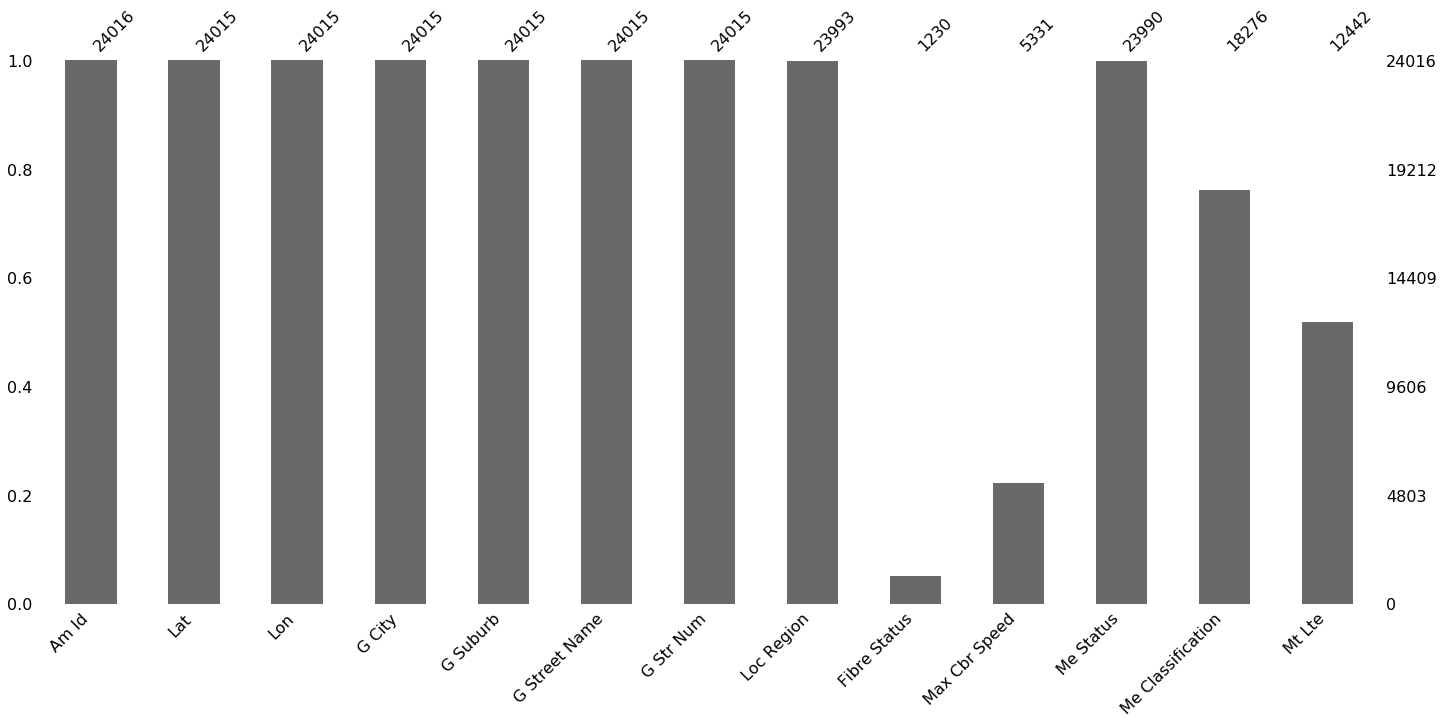

In [85]:
mgno.bar(df)

### Missing Values Percent

In [86]:
#calcualte % 
missing_percentage = pd.DataFrame(df.isnull().sum()  /len(df)*100, columns=['% Miss.'])
missing_percentage 

,% Miss.
Am Id,0.000000
Lat,0.004164
Lon,0.004164
G City,0.004164
G Suburb,0.004164
G Street Name,0.004164
G Str Num,0.004164
Loc Region,0.095769
Fibre Status,94.878414
Max Cbr Speed,77.802298


In [87]:
missing_perc = missing_percentage[missing_percentage['% Miss.'] > 10].sort_values('% Miss.',ascending=True)
missing_perc

,% Miss.
Me Classification,23.900733
Mt Lte,48.192871
Max Cbr Speed,77.802298
Fibre Status,94.878414


Text(0.5,1,'% Missing')

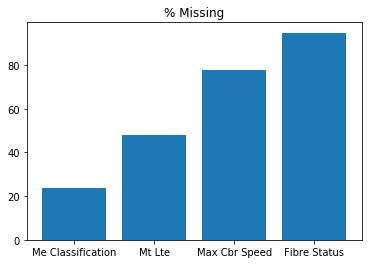

In [88]:
plt.bar(missing_perc.index, missing_perc['% Miss.'])
plt.title('% Missing')

In [89]:
present_data_counts = pd.DataFrame(df.count(),columns=['Present Values'])

# 4. Summary Statistics

In [90]:
df.describe(include=['object'])

,Lat,Lon,G City,G Suburb,G Street Name,G Str Num,Loc Region,Fibre Status,Max Cbr Speed,Me Status,Me Classification,Mt Lte
count,24015,24015,24015,24015,24015,24015,23993,1230,5331,23990,18276,12442
unique,20897,20905,1135,6053,9572,5136,6,7,18,4,5,1
top,-33.907174,18.421443,JOHANNESBURG,PRETORIA CENTRAL,MAIN ST,1,NER,WORKING,1000,WORKING,Intra-city,LTE
freq,21,21,1297,162,423,2269,6061,935,1908,18308,11122,12442


In [91]:
#create categorical dataset
categoricalDataset = df.loc[:, df.dtypes == np.object]
#List of features that are in the categorical dataset
catList = list(df.loc[:, df.dtypes == np.object])
print(catList)


['Lat', 'Lon', 'G City', 'G Suburb', 'G Street Name', 'G Str Num', 'Loc Region', 'Fibre Status', 'Max Cbr Speed', 'Me Status', 'Me Classification', 'Mt Lte']


### Mode

In [92]:
#mode
#iterate through the list of categorical features and for each feature, get the count of all the values, get the value with highest count and append its key value to my list
mode = []
for i in categoricalDataset:
    mode.append(categoricalDataset[i].value_counts().keys()[0])
#put the list into a dataframe
cat_mode = pd.DataFrame(mode, index=catList, columns=['Mode'])
cat_mode

,Mode
Lat,-33.907174
Lon,18.421443
G City,JOHANNESBURG
G Suburb,PRETORIA CENTRAL
G Street Name,MAIN ST
G Str Num,1
Loc Region,NER
Fibre Status,WORKING
Max Cbr Speed,1000
Me Status,WORKING


### Mode Frequency

In [93]:
#mode frequency
#iterate through the list of categorical features and for each feature, get the count of all the values, get the value with highest count and append it to my list
categorical_mode_freq = [] 
for i in catList:
    categorical_mode_freq.append(categoricalDataset[i].value_counts().max())
#put list of values with highest count into dataframe 'cat_mode_freq'
cat_mode_freq = pd.DataFrame(categorical_mode_freq,  index=catList, columns=['Mode Freq.'])
cat_mode_freq

,Mode Freq.
Lat,21
Lon,21
G City,1297
G Suburb,162
G Street Name,423
G Str Num,2269
Loc Region,6061
Fibre Status,935
Max Cbr Speed,1908
Me Status,18308


### Mode %

In [94]:
#mode%
#iterate through the list of categorical features and for each feature, get the count of all the values, get the value with highest count and divide it by the length 
#of all the values in that column multipled by 100 and append its value to my list
categorical_mode_percentage = []
for i in categoricalDataset:
	categorical_mode_percentage.append(categoricalDataset[i].value_counts().max() /len(categoricalDataset)*100)
#put the list of percentages into a dataframe
cat_mode_percent = pd.DataFrame(categorical_mode_percentage, index=catList, columns=['Mode %'])
cat_mode_percent

,Mode %
Lat,0.087442
Lon,0.087442
G City,5.400566
G Suburb,0.674550
G Street Name,1.761326
G Str Num,9.447868
Loc Region,25.237342
Fibre Status,3.893238
Max Cbr Speed,7.944704
Me Status,76.232512


# 5. Data Quality Report

In [95]:
data_quality_report = data_types.join(present_data_counts).join(missing_data_counts).join(missing_percentage).join(unique_value_counts).join(cat_mode).join(cat_mode_freq).join(cat_mode_percent)

In [96]:
print("\nData Quality Report")
print("Total records: {}".format(len(df.index)))
data_quality_report


Data Quality Report
Total records: 24016


,Data Type,Present Values,Missing Values,% Miss.,Unique Values,Mode,Mode Freq.,Mode %
Am Id,int64,24016,0,0.000000,24016,NaN,NaN,NaN
Lat,object,24015,1,0.004164,20898,-33.907174,21.0,0.087442
Lon,object,24015,1,0.004164,20906,18.421443,21.0,0.087442
G City,object,24015,1,0.004164,1136,JOHANNESBURG,1297.0,5.400566
G Suburb,object,24015,1,0.004164,6054,PRETORIA CENTRAL,162.0,0.674550
G Street Name,object,24015,1,0.004164,9573,MAIN ST,423.0,1.761326
G Str Num,object,24015,1,0.004164,5137,1,2269.0,9.447868
Loc Region,object,23993,23,0.095769,7,NER,6061.0,25.237342
Fibre Status,object,1230,22786,94.878414,8,WORKING,935.0,3.893238
Max Cbr Speed,object,5331,18685,77.802298,19,1000,1908.0,7.944704


# 6. Conclusion

For the scope of this project we will only use the gps coordinates and addresses of the BCX sites. The data of the selected features are largely consistent, complete and usable.